In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('hw1_data.csv')
df = df.drop(['title', 'release_date', 'production_companies', 'production_countries'], axis=1)

In [4]:
df = df[df['budget'] != 0]
df['profit'] = (df['revenue'] - df['budget'])/df['budget']

In [5]:
movies_by_genre = df.groupby(['genres'], as_index=False).mean()
max_profit = movies_by_genre[
    movies_by_genre['profit'] == movies_by_genre['profit'].max()
]
max_profit

,genres,budget,revenue,runtime,vote_average,profit
2,Animation,9.259515e+07,3.330425e+08,91.770115,6.387356,2.984725


In [6]:
print(f"Budget: {max_profit.budget.iloc[0]:,.2f}")
print(f"Revenue: {max_profit.revenue.iloc[0]:,.2f}")

Budget: 92,595,145.97
Revenue: 333,042,519.93


In [7]:
df2 = df[df['genres'] == max_profit.genres.iloc[0]]
df2 = df2.drop(['genres', 'budget', 'revenue'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d0e8c88>,
      dtype=object)

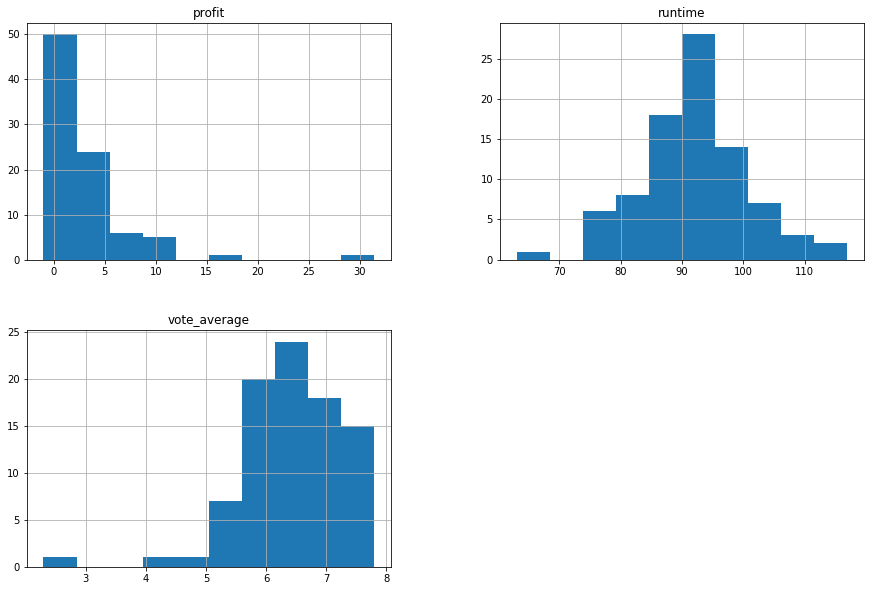

In [8]:
df2.hist(figsize=(15, 10), bins=10)

In [9]:
df2 = df2.sort_values('profit')

In [27]:
min_profit = df2['profit'].min()
max_profit = df2['profit'].max()
bins_size = (max_profit - min_profit)/11
bins = np.arange(min_profit, max_profit, bins_size)

In [28]:
df2.groupby(pd.cut(df2["profit"], bins)).mean()

,runtime,vote_average,profit
profit,,,
"(-1.0, 1.948]",90.510638,6.129787,0.652635
"(1.948, 4.895]",94.960000,6.600000,3.340230
"(4.895, 7.843]",90.833333,6.933333,6.345395
"(7.843, 10.79]",92.250000,6.550000,9.192311
"(10.79, 13.738]",89.500000,7.350000,11.612492
"(13.738, 16.685]",NaN,NaN,NaN
"(16.685, 19.633]",90.000000,7.400000,17.001794
"(19.633, 22.58]",NaN,NaN,NaN
"(22.58, 25.528]",NaN,NaN,NaN
